# Sentiments analysis:
The Sentiment Analysis Model is used, which examines a large corpus of data including user evaluations, detects a pattern, and draws a conclusion based on genuine evidence rather than assumptions based on a small sample of data.
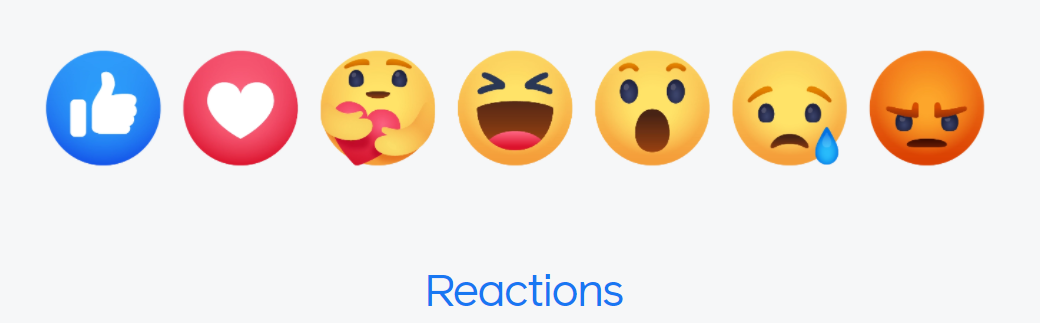

Basic Python Libraries

1. Pandas – library for data analysis and data manipulation
2. Matplotlib – library used for data visualization
3. Seaborn – a library based on matplotlib and it provides a high-level interface for data visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#we will create the data frame with read_csv() and parameters as “delimiter” and “names”.
df_train= pd.read_csv('train.txt',delimiter=';',names=['text','label'] )
df_val= pd.read_csv('val.txt',delimiter=';',names=['text','label'] )

In [6]:
# we will concat both datset
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df.label

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
17995    sadness
17996        joy
17997        joy
17998        joy
17999        joy
Name: label, Length: 18000, dtype: object

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

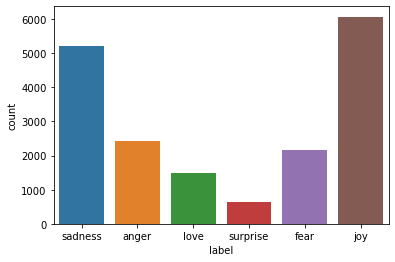

In [8]:
sns.countplot(df.label)

1. Positive Sentiment – “joy”,”love”,”surprise”

2. Negative Sentiment – “anger”,”sadness”,”fear”

In [10]:
df.label.replace({'joy':1,'love':1,'surprise':1, 'anger':0,'sadness':0,'fear':0},inplace=True)
df.label

0        0
1        0
2        0
3        1
4        0
        ..
17995    0
17996    1
17997    1
17998    1
17999    1
Name: label, Length: 18000, dtype: int64

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

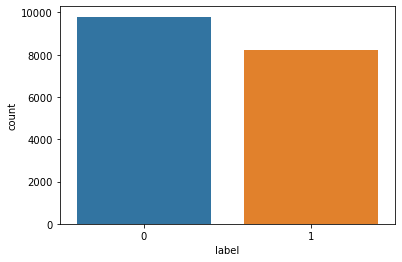

In [11]:
sns.countplot(df.label)

### cleaning the data
BoW/TF-IDF is uded to convert text into numeric vector
- Step1: preprocess and remove punctuations [,./?} ] 
- step2: Lower the text
- step3: create lemmatization/stemning
- step4: remove stopwords from text
- step5: Creating the Bag of Word (BoW) model

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [15]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [22]:
corpus=[]
for i in range(len(df)):
    review= re.sub('[^a-zAZ]',' ',df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)
    
    

In [23]:
corpus[1]

'go feeling hopeless damned hopeful around someone care awake'

##### Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors

In [25]:
# Now we will convert this text inot vector
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
traindata= cv.fit_transform(corpus)
X= traindata #Independent features
y= df.label # dependent features

In [29]:
X.shape,y.shape

((18000, 14295), (18000,))

### Building the model on training data
Now comes the machine learning model creation part and in this project, I’m going to use Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### Test Data Transformation
Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.


In [39]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])

In [40]:
test_df.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [41]:
#object of WordNetLemmatizer
wordnet = WordNetLemmatizer()
corpus=[]
for i in range(len(test_df)):
    review= re.sub('[^a-zAZ]',' ',test_df['text'][i])
    review= review.lower()
    review= review.split()
    review= [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)
    
X_test= cv.transform(corpus)
y_test=test_df.label.replace({'joy':1,'love':1,'surprise':1, 'anger':0,'sadness':0,'fear':0})
  


### Model Evaluation
We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix.

In [42]:
y_pred= rf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
cm= confusion_matrix(y_test,y_pred)
print(cm)
report= classification_report(y_test,y_pred)
print(report)

0.9555
[[1018   62]
 [  27  893]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1080
           1       0.94      0.97      0.95       920

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

